In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import LeaveOneOut, KFold

In [2]:
df = pd.read_csv("data/combined.csv")

In [3]:
# this is ground truth values
truth = df["murder_rate"].values

In [4]:
"""
Run random forest regression.
"""
def predict_rand_forest(x_col_names, df):        
    model = RandomForestRegressor()
    n_features = len(x_col_names)
    x_train = df[x_col_names].values.reshape(-1, n_features)
    y_train = df["murder_rate"].values.reshape(-1, 1)    
    model.fit(x_train, y_train)    
    return model.predict(x_train)

In [5]:
"""
Run kfold cross-validation of random forest regression.
"""
def predict_kfold_rand_forest(x_col_names, df, n_folds=10):    
    model = RandomForestRegressor()
    n_features = len(x_col_names)
    kf = KFold(len(df), n_folds)
    predicted = []
    for train, test in kf:
        x_train = df.iloc[train][x_col_names].values.reshape(-1, n_features)
        y_train = df.iloc[train]["murder_rate"].values.reshape(-1, 1)
        model.fit(x_train, y_train)    
        x_test = df.iloc[test][x_col_names].values.reshape(-1, n_features)
        predicted.extend(model.predict(x_test))
    return predicted

In [6]:
"""
Run LOO cross-validation of random forest regression.
"""
def predict_loo_rand_forest(x_col_names, df):
    model = RandomForestRegressor()
    n_features = len(x_col_names)
    loo = LeaveOneOut(len(df))
    predicted = []
    for train, test in loo:
        x_train = df.iloc[train][x_col_names].values.reshape(-1, n_features)
        y_train = df.iloc[train]["murder_rate"].values.reshape(-1, 1)
        model.fit(x_train, y_train)    
        x_test = df.iloc[test][x_col_names].values.reshape(-1, n_features)
        predicted.extend(model.predict(x_test))
    return predicted

In [7]:
predicted = predict_rand_forest(["no_high_school", "poverty_rate", "incarceration_rate"], df)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [8]:
mse = mean_squared_error(truth, predicted)
print "mean squared error", mse

mae = mean_absolute_error(truth, predicted)
print "mean absolute error", mae

mean squared error 0.259334
mean absolute error 0.3546


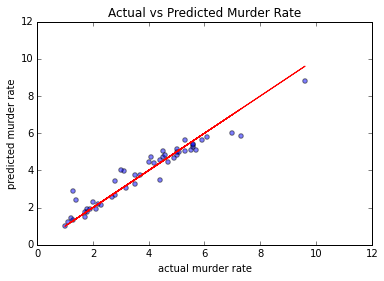

In [9]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()

In [10]:
predicted = predict_kfold_rand_forest(["no_high_school", "poverty_rate", "incarceration_rate"], df)
print len(predicted)
print predicted

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column

50
[5.1500000000000004, 1.4300000000000002, 4.9299999999999997, 5.1199999999999992, 5.1299999999999999, 1.97, 2.9300000000000002, 4.71, 4.5499999999999998, 5.5699999999999994, 1.7599999999999998, 5.3299999999999992, 4.7800000000000002, 5.5899999999999999, 1.7400000000000002, 2.4200000000000004, 5.29, 4.7599999999999998, 1.55, 3.1000000000000001, 1.8300000000000001, 5.3299999999999992, 2.4500000000000006, 7.3699999999999992, 3.7799999999999998, 2.5, 2.3200000000000003, 4.7999999999999998, 1.3999999999999999, 4.8600000000000003, 4.8899999999999997, 3.2299999999999995, 4.2599999999999998, 1.7, 5.1000000000000005, 5.1799999999999997, 2.9300000000000002, 5.0300000000000002, 4.6300000000000008, 4.3800000000000008, 2.2000000000000002, 4.9100000000000001, 4.7999999999999998, 1.75, 1.8900000000000001, 4.8399999999999999, 2.8400000000000003, 5.0700000000000003, 2.0600000000000001, 2.04]


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


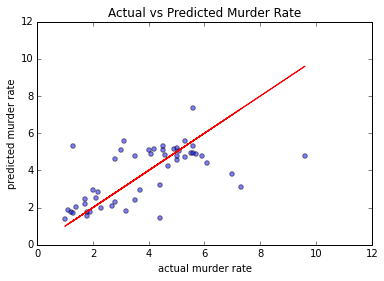

In [11]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()

In [12]:
predicted = predict_loo_rand_forest(["no_high_school", "poverty_rate", "incarceration_rate"], df)
print len(predicted)
print predicted

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column

50
[4.96, 1.5299999999999998, 4.9900000000000002, 4.8799999999999999, 4.4300000000000006, 1.97, 3.04, 4.9500000000000011, 5.5200000000000005, 5.0800000000000001, 1.77, 4.6000000000000005, 4.0900000000000007, 4.7000000000000002, 2.25, 2.1699999999999999, 5.4599999999999991, 5.2999999999999998, 1.6400000000000001, 3.46, 2.5200000000000005, 4.5800000000000001, 2.9899999999999998, 5.1300000000000008, 4.4700000000000006, 2.0499999999999998, 2.3700000000000001, 5.2999999999999998, 1.73, 4.6699999999999999, 6.0500000000000007, 4.7599999999999998, 4.6599999999999993, 2.1600000000000001, 5.5000000000000009, 4.6299999999999999, 2.7799999999999998, 5.0299999999999994, 4.46, 4.8600000000000003, 1.7600000000000002, 4.8700000000000001, 4.4900000000000002, 1.7900000000000003, 1.6600000000000001, 5.0800000000000001, 2.8900000000000001, 5.1700000000000008, 2.2800000000000002, 2.3099999999999996]


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


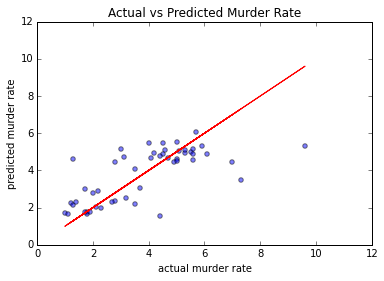

In [13]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()